#### Дано:
- код для генерации двумерного массива в pygame. Начало координат в окне pygame находится в левом верхнем углу
- полученный массив выводится с помощью библиотеки matplotlib, где начало координат находится в левом нижнем углу
- таким образом изображение в matplotlib выглядит отраженным по вертикали по отношению к исходному в pygame

#### Требуется:
- внести изменения в код генератора данных для корректировки координат точек массива так, чтобы множество точек в pygame и matplotlib выглядели одинаково (для этого нужно сделать преобразования координат в момент генерации точек и обратное преобразование - в момент отображение в pygame)
- (не обязательно) убрать из массива точек повторяющиеся объекты (оставить только уникальные)

#### Выполнил: Устинов Константин 05-804

In [1]:
!pip install pygame

In [2]:
import pygame
import numpy as np
import matplotlib.pyplot as plt

pygame 2.0.1 (SDL 2.0.14, Python 3.8.5)
Hello from the pygame community. https://www.pygame.org/contribute.html


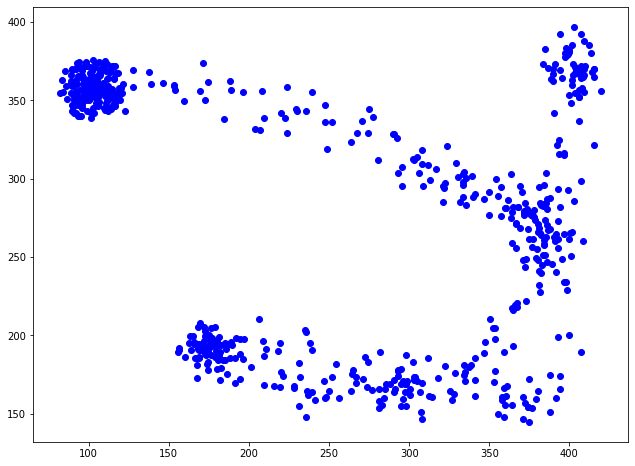

In [8]:
points = np.empty((0, 2), dtype='f')

c_radius = 2
c_color = (0, 0, 255)
c_thickness = 0

bg_color = (255, 255, 255)
(width, height) = (640, 480)
screen = pygame.display.set_mode((width, height))
pygame.display.set_caption('Points Generator')

running = True
pushing = False

while running:

    for event in pygame.event.get():
        if event.type == pygame.QUIT:
            running = False
        elif event.type == pygame.MOUSEBUTTONDOWN:
            pushing = True
        elif event.type == pygame.MOUSEBUTTONUP:
            pushing = False
    if pushing:
        (x, y) = pygame.mouse.get_pos()
        # coord = [x, y]
        r = np.random.uniform(0, 20)
        t = np.random.uniform(0, 2*np.pi)
        coord = [x + r*np.cos(t), height - (y + r*np.sin(t))] # Отражение относительно оси Х
        global points
        if coord not in points: # Если значение уникально, то добавляем 
            points = np.append(points, [coord], axis=0)
        
    screen.fill(bg_color)
    for point in points:
        # При отрисовке отражаем обратно
        pygame.draw.circle(screen, c_color, (int(point[0]), height - int(point[1])), c_radius, c_thickness)
    pygame.display.flip()

pygame.quit()
fig = plt.figure(figsize=(width/60, height/60))
# Если нужно выводить без масштабирования точек
#plt.xlim([0, width]) 
#plt.ylim([0, height])
plt.scatter(points[:,0], points[:,1], c='blue')
plt.show()